# Assignment 06.11.17 - Patrick Werner

## Exercise 1
![Mindmap](mindmap.png)

## Exercise 2

In [1]:
import sympy as sp
sp.init_printing(use_latex=True)
sigma, r_xd, r_x, w = sp.symbols('sigma r_xd r_x, w')

# The cost function
costF = 1/2 * sigma**2 - r_xd*w+1/2*r_x*w**2
costF

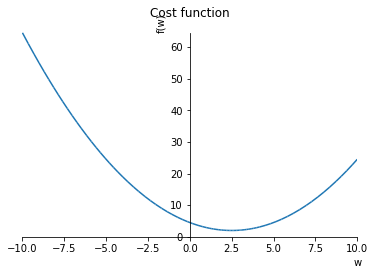

In [2]:
import numpy as np
eta = 0.1
r_xdV = 2
r_xV = 0.8
sigmaV = 3

# Plot the cost function with arbitrary constants
subsCostF = costF.subs(sigma,sigmaV).subs(r_xd, r_xdV).subs(r_x, r_xV)
sp.plot(subsCostF, title="Cost function")
diffCostF = sp.diff(subsCostF, w)

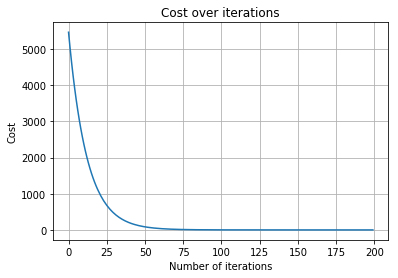

The minimum value is 2.50033917052709


In [3]:
import matplotlib.pyplot as plt
wV = []
wV.append(np.random.uniform(-10000, 10000))

# Apply steepest descent algorithm
for i in range(1, 200):
    wV.append(wV[i-1] - eta*diffCostF.subs(w,wV[i-1]))
    
# Plot the evolution of the cost
plt.plot(wV)
plt.title('Cost over iterations')
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()
print("The minimum value is", wV[len(wV)-1])

The function seems to be a parabola. With the steepest descent algorithm the local minimum can be found.

## Exercise 3
### a)

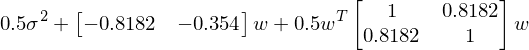

In [4]:
sigma = sp.MatrixSymbol('sigma', 1, 1)
w = sp.MatrixSymbol('w', 2, 1)
R_x = sp.Matrix([[1, 0.8182], [0.8182,1]])
r_xd = sp.Matrix([[0.8182], [0.354]])

# The cost function with the matrix values
costF = 1/2 * sigma**2 - r_xd.T * w + 1/2 * w.T * R_x * w
costF

In [5]:
# Derivative of the matrix
diffCostF = sp.Matrix(costF).jacobian(w)
diffCostF

In [6]:
def steepestDescent(diffCostF, eta, nIt):
    wV = []
    wV.append(np.array([0, 0]))
    for i in range(1, nIt):
        d = diffCostF.subs(w[0], wV[i-1][0]).subs(w[1], wV[i-1][1])
        wV.append(wV[i-1] - eta * np.array(d)[0])
    return wV

# Apply steepestDescent algorithm
wV = steepestDescent(diffCostF, 0.3, 5000)

In [7]:
print("The minimum point after 5000 Iterations is", wV[len(wV)-1].tolist())

The minimum point after 5000 Iterations is [1.59902944424901, -0.954325891284540]


The optimum value for w* seems to be (1.6, -0.95).

### b)

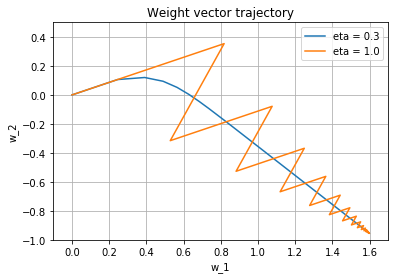

In [8]:
def remapWeights (wV):
    x = []
    y = []
    for i in range(0, len(wV)):
        x.append(wV[i][0])
        y.append(wV[i][1])
    return (x, y)

# Apply steepest descent algorithm for different etas
wV0 = steepestDescent(diffCostF, 0.3, 5000)
wV1 = steepestDescent(diffCostF, 1.0, 5000)
w0 = remapWeights(wV0)
w1 = remapWeights(wV1)

# Plot the results
plt.figure(1)
plt.plot(w0[0], w0[1], label="eta = 0.3")
plt.plot(w1[0], w1[1], label="eta = 1.0")
plt.xlabel("w_1")
plt.ylabel("w_2")
plt.title("Weight vector trajectory")
plt.xlim([-0.1, 1.7])
plt.ylim([-1, 0.5])
plt.grid()
plt.legend()
plt.show()

As can bee seen in the plot, higher values for eta cause a zig zagging of the trajectory.

## Exercise 4

In [9]:
# Calculate eta's range according to the formula from Haykin's book
R_x = sp.Matrix([[1, 0.5], [0.5,1]])
print("The range for eta is 0 < eta < ", 2/sp.Trace(R_x).doit())

The range for eta is 0 < eta <  1


According the the formula from Haykin's book the range for eta is between 0 and 1 for the given matrix.

## Exercise 5
### a)

In [10]:
sigma_d = sp.MatrixSymbol('sigma_d', 1, 1)
w = sp.MatrixSymbol('w', 2, 1)
R_x = sp.MatrixSymbol('R_x', 2, 2)
r_xd = sp.MatrixSymbol('r_xd', 2, 1)

# The previous function
F = 1/2 * sigma_d**2 - r_xd.T * w + 1/2 * w.T * R_x * w
F

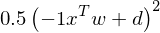

In [11]:
d = sp.MatrixSymbol('d', 1, 1)
x = sp.MatrixSymbol('x', 2, 1)

# The new J function
J = 1/2 * (d - x.T*w)**2
J

In [12]:
# Expand the function
sp.expand(sp.Matrix(J))

In [13]:
# Subsitite variables as specified
F = F.subs(sigma_d, d).subs(r_xd, x*d).subs(R_x, x * x.T)
# Expand the function, should be equal to J
sp.expand(sp.Matrix(F))

As can be seen the two functions are equal.

### b)

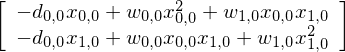

In [14]:
# Substitute variables into given function
g = -r_xd + R_x * w
sp.Matrix(g.subs(r_xd, x * d).subs(R_x, x*x.T))

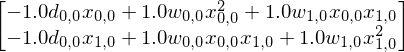

In [15]:
# Gradient of J, should be equal to g
sp.expand(sp.Matrix(J).jacobian(w)).T

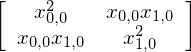

In [16]:
# Substitute variables into given function
H = R_x
sp.Matrix(H.subs(R_x, x*x.T))

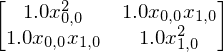

In [17]:
# Hessian of J, should be equal to H
sp.Matrix(J).jacobian(w).jacobian(w)

These functions are also equal.

### c)

In [18]:
eta = sp.symbols('eta')
# Given formula
#newW = w + eta * R_x * x *(d - x.T * w)
# R_x can be ignored as it is constant
newW = w + eta * x *(d - x.T * w)
newW

In [19]:
# Start with formula from Haykin's book
#nW = w + eta * x * e
#nW = nW.subs(e, d - x.T * w)
# Doesn't look the same with subs. Substitute manually. Should be the same as newW
nW = w + eta * x * (d - x.T * w)
nW

Because the inverse of the calculation is calculated ahead of time the values are constant.
When ignoring the $R_x^{-1}$ values the functions are equal.